# **Algoritmo de recomendação**

Os dois principais algoritmos de recomendação são:

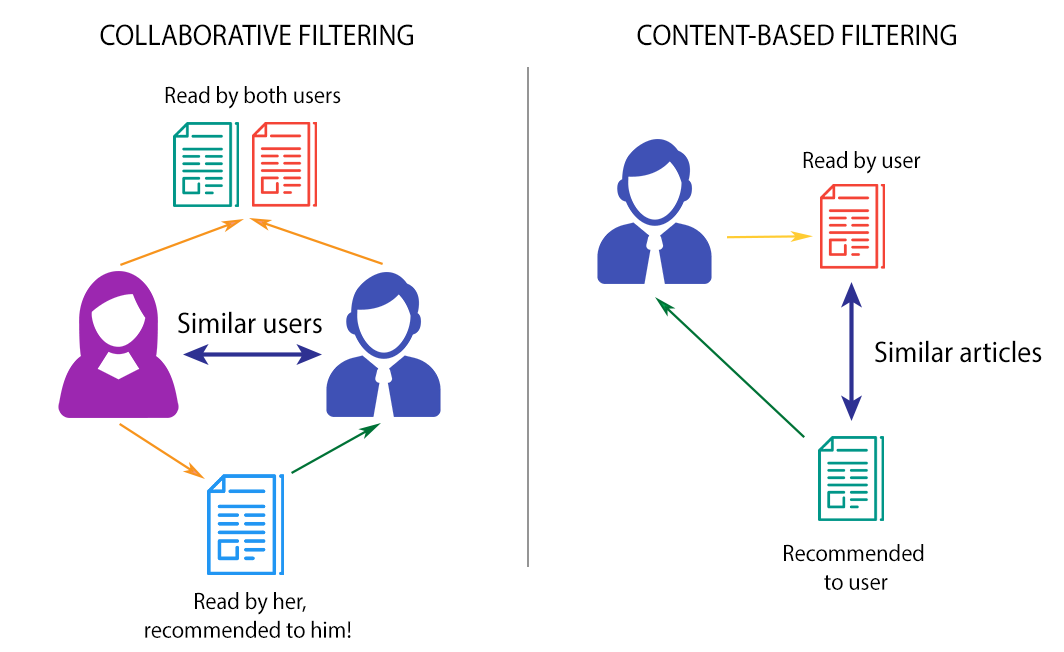 [Fonte](http://coral.ufsm.br/pet-si/index.php/sistemas-de-recomendacao-desvendando-uma-parte-da-magica/)

No **colaborativo**, a recomendação é baseada na analise de similaridade de usuários, indicando itens que um usuário parecido também gostou/comprou. 

No **baseado em conteúdo**, é procurado um item que se assemelha ao conteúdo daquele já comprado/assistido/curtido. 




#**Quiz 1: Se fosse para escolher só um sistema de recomendação para sempre, qual você escolheria:**

a) Youtube

b) Spotify

c) Netflix




No projeto de hoje, trabalharemos com o modelo **colaborativo** e vamos implementar exatamente a sequencia algoritmos abaixo

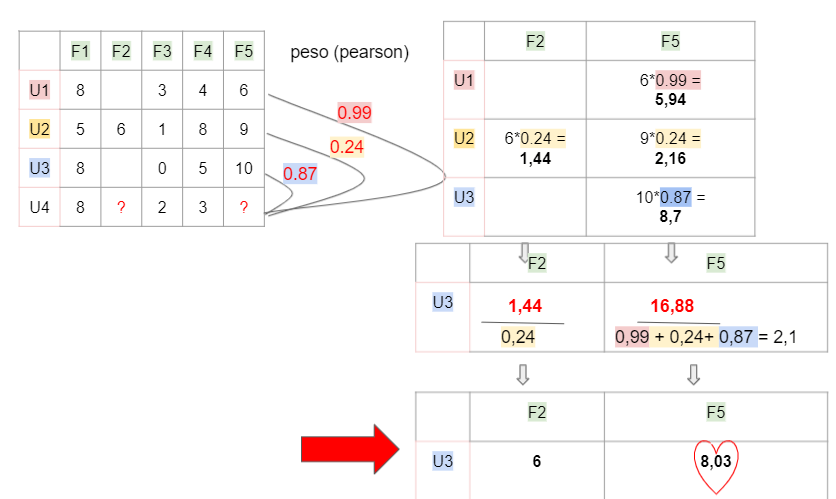


#Criação dos dados 

Vamos fazer o passo a passo para compreender como é a implementação da matemática e a ideia do algoritmo. Inicialmente, vamos criar os dados do sistema:

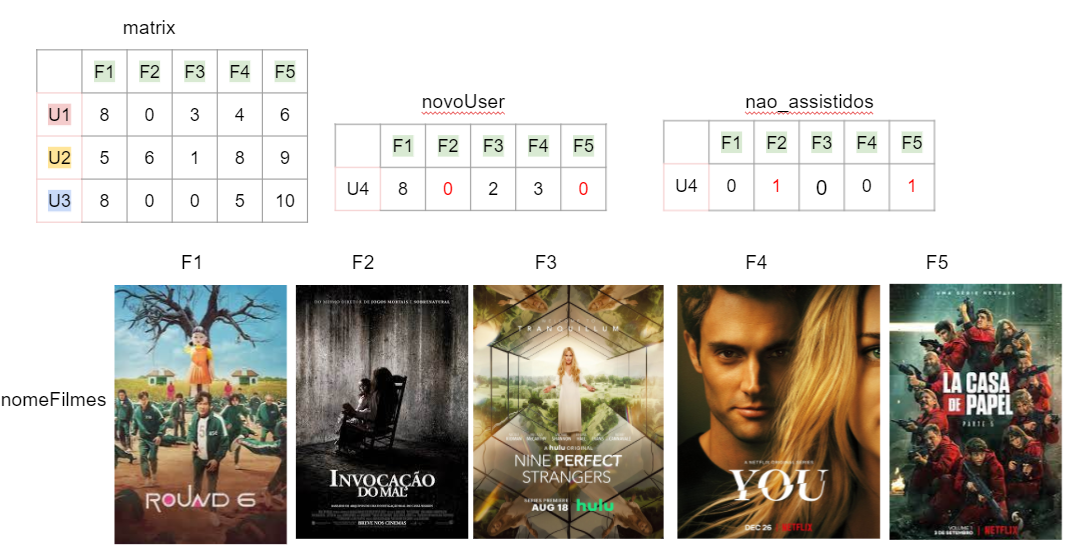




In [1]:
import scipy
from scipy import stats
import numpy as np

#criação dos dados que vamos utilizar
matrix = np.array([[8,0,3,4,6],[5,6,1,8,9],[8,0,0,5,10]])
novoUser = [8,0,2,3,0]
nao_assistidos = [0,1,0,0,1]


nomeFilmes= ['Round 6',  'A Invocação do Mal','9 Desconhecidos','You' ,'La Casa de Papel']

# **Quiz 2: Qual seu maior terror da ciencia de dados**

a) programação

b) matematica

c) negócio

# **Computando a similaridade entre o novoUser e os usuários do sistema**

Existem vários tipos de formulas para computar similaridade entre itens (no caso, usuários). Nesse projeto, usaremos a similaridade de Pearson:

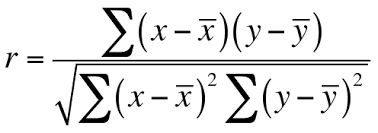

Fonte

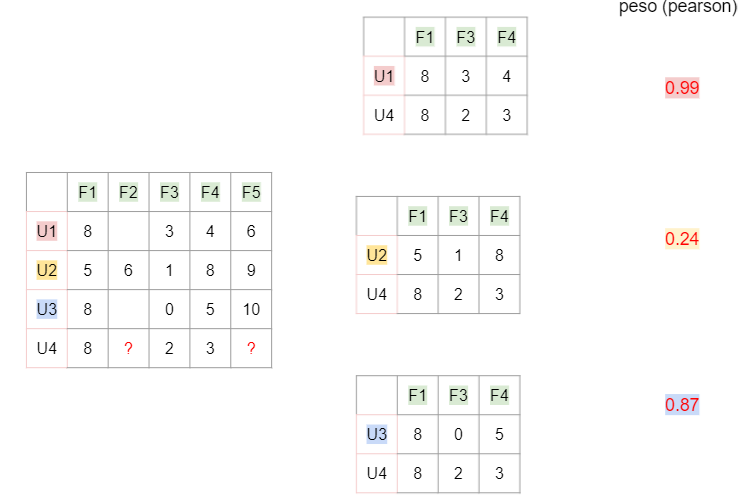

Quanto mais o valor da correlação, mais similar são os usuários! 

In [ ]:
#criando um vetor com 3 posições e preencher com zero (vamos colocar os valores da similaridade entre o novoUser e cada outro usuário da matriz )
similarity =[0] * 3

#para cada usuário no sistema... 
for i in range(0,3):
  #vamos pegar os dados desse usuário
  temp = matrix[i,:]

  #MAS QUEREMOS APENAS COMPARAR OS DADOS QUE O NOVO USER ASSISTIU (OU SEJA... QUE NOVOUSER != 0)
  tempUser= [t for n,t in zip(novoUser,temp) if n != 0]
  tempNovoUser= [n for n in novoUser if n != 0] 

  #para verificar o processo
  print('user:',i)
  print(tempUser, tempNovoUser)      

  #vamos usar a biblioteca scipy.stats que ja calcula o pearson!!! 
  similarity[i] = scipy.stats.pearsonr(tempUser,tempNovoUser)[0] #a função retorna dois valores e o primeiro é o coefieciente de pearson

user: 0
[8, 3, 4] [8, 2, 3]
user: 1
[5, 1, 8] [8, 2, 3]
user: 2
[8, 0, 5] [8, 2, 3]


# Multiplicando nota dos usuários da base pela similaridade

Vamos usar a similaridade como um peso para a nota de cada usuário. 

Se a similaridade for alta, vamos multiplicar um valor muito perto de 1 à nota do usuário. 

Objetivo:


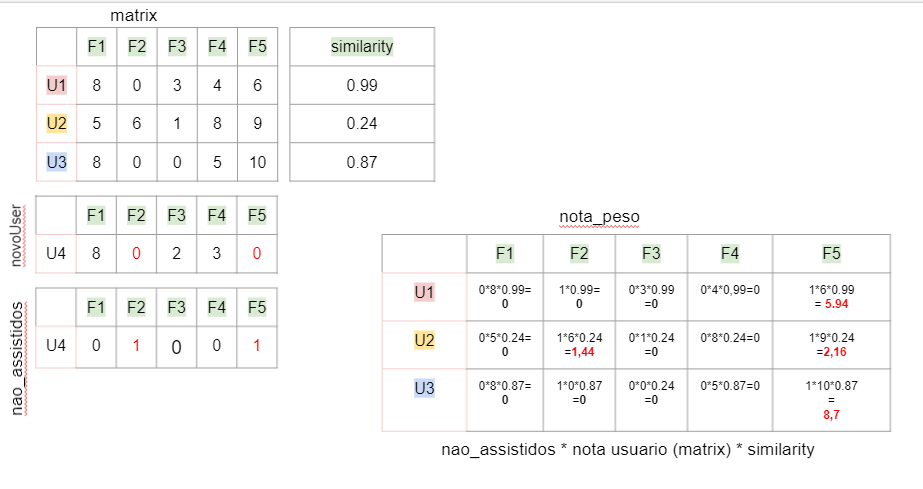

In [ ]:
nota_peso = np.zeros((3,5))

for nUser in range(3):
  for nFilme in range(5):
    nota_peso[nUser][nFilme] = nao_assistidos[nFilme] * matrix[nUser][nFilme] * similarity[nUser]

print(nota_peso)

[[0.         0.         0.         0.         5.99654278]
 [0.         1.41729263 0.         0.         2.12593894]
 [0.         0.         0.         0.         8.7236861 ]]


# Agora vamos somar as notas com peso de cada um dos usuários em uma nota acumulada para cada filme

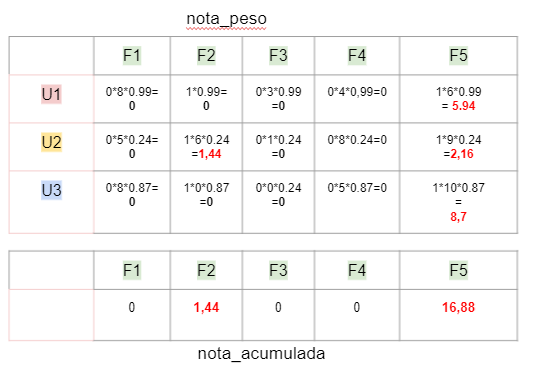

In [ ]:
notas_acumuladas = np.sum(nota_peso.T,axis=1)
print(notas_acumuladas)

[ 0.          1.41729263  0.          0.         16.84616782]


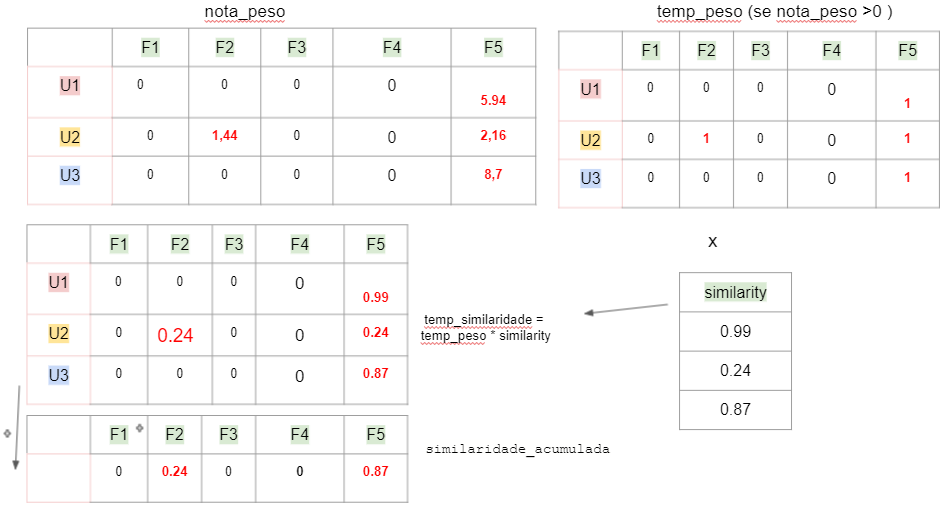

In [ ]:
temp_peso = nota_peso
temp_peso[nota_peso > 0] = 1
print(temp_peso) 
temp_similaridade = np.zeros((3,5)) 
for nUser in range(3):
  for nFilme in range(5):
    temp_similaridade[nUser][nFilme] = temp_peso[nUser][nFilme] * similarity[nUser]

print(temp_similaridade)

similaridade_acumulada = np.sum(temp_similaridade.T,axis=1)
print(similaridade_acumulada)

[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
[[0.         0.         0.         0.         0.9994238 ]
 [0.         0.23621544 0.         0.         0.23621544]
 [0.         0.         0.         0.         0.87236861]]
[0.         0.23621544 0.         0.         2.10800785]


# Agora vamos dividir!

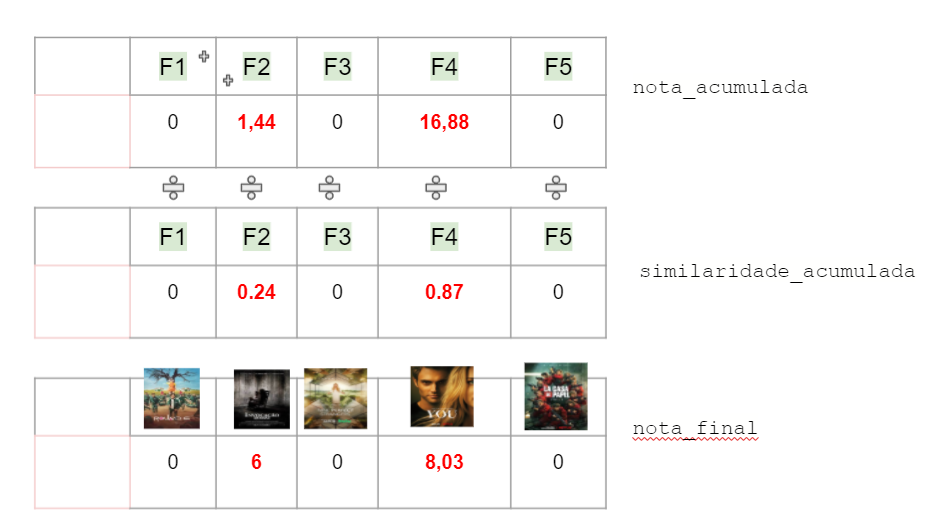

In [ ]:
nota_final =[0] * 5
#agora a normalização para cada filme com nota acumulada, eu normalizo pela soma dos pesos (similaridade)
for nFilme in range(5):
  if(similaridade_acumulada[nFilme] > 0):
    nota_final[nFilme] =  notas_acumuladas[nFilme] / similaridade_acumulada[nFilme]
  else:
    nota_final[nFilme] = 0

print(nota_final)


[0, 6.0, 0, 0, 7.991510972567143]


# Finalmente podemos ordenar as notas e captar nos nomes dos filmes recomendados!

In [ ]:
nAssistidos = sum(nao_assistidos)

notasOrdenadasIndex = sorted(range(len(nota_final)),key=nota_final.__getitem__)[::-1][0:nAssistidos]
print(notasOrdenadasIndex)

for i in notasOrdenadasIndex:
  print(nomeFilmes[i], 'nota: ', nota_final[i])


[4, 1]
La Casa de Papel nota:  7.991510972567143
A Invocação do Mal nota:  6.0


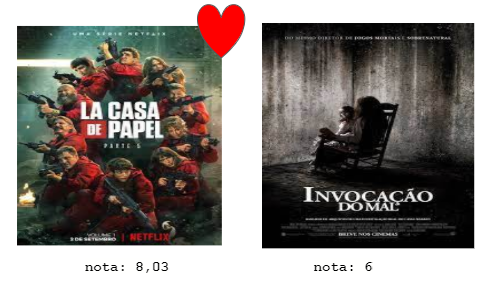